<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

<h1>Data Loading & Exploration </h1>

<h3>1.Import necessary libraries. </h3>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import re
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial as f
from pylab import rcParams
rcParams['figure.figsize'] = 10, 15
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score
from matplotlib.font_manager import FontProperties

<h3>2.Display a sample of five rows of the data frame..</h3>

In [ ]:
df=pd.read_csv('marketing_data.csv')

In [ ]:
df.sample(n=5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
681,9495,1982,Graduation,Together,"$71,853.00",0,0,5/8/13,29,358,...,6,1,0,0,0,0,0,0,0,SP
652,10736,1971,Graduation,Single,"$72,258.00",0,1,9/12/13,28,522,...,5,2,0,0,0,0,0,0,0,CA
611,8346,1974,Graduation,Single,"$32,233.00",1,0,8/19/12,26,138,...,2,9,1,0,0,0,0,1,0,SP
1387,2061,1955,Graduation,Married,"$50,737.00",0,1,5/11/13,61,78,...,4,6,0,1,0,0,0,0,0,SP
1146,10556,1959,Graduation,Married,"$54,984.00",0,1,5/24/14,51,173,...,6,7,0,0,0,1,0,0,0,SP


<h3>3. Check the shape of the data (number of rows and column). Check the general information about the dataframe using .info() method.
</h3>

In [ ]:
def basic_info(df):
    '''checking basic information & shape about the dataframe'''
    temp=df.copy(deep=True)
    print("Shape of the dataset",df.shape)
    print("*"*30)
    print(df.info())
    
basic_info(df)

Shape of the dataset (2240, 28)
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
 Income                2216 non-null object
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVis

<h3>4.Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any</h3>

In [ ]:
def check_missing_values(df):
    '''Function to check the missing data percentage'''
    print("percentage of missing data of dataframe \n",df.isnull().sum()/len(df)*100)
    
check_missing_values(df)

percentage of missing data of dataframe 
 ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
 Income                1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Response               0.000000
Complain               0.000000
Country                0.000000
dtype: float64


- As we can see we have only 1% missing data in the Income column we will directly use dropna function to drop the missing values.

In [ ]:
df.dropna(axis=0,inplace=True)
check_missing_values(df)

percentage of missing data of dataframe 
 ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
 Income                0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Response               0.0
Complain               0.0
Country                0.0
dtype: float64


<h3> 5. Check if there are any duplicate rows.</h3>

In [ ]:
def check_duplicate(df):
    duplicate=df[df.duplicated()]
    return duplicate

duplicate=check_duplicate(df)
duplicate

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country


<h3> 6. Remove the extra spaces in the ‘Income’ column name. </h3>

In [ ]:
def remove_space(df):
    '''function to remove spaces from the name of columns'''
    df.columns = df.columns.str.replace(' ', '') 
    return df

df=remove_space(df)

<h3> 7. Check the dtype of values in column 'Income'. Convert the values in the 'Income' column to numeric format. </h3>

In [ ]:
def map_income(x):
    try:
        x = x.strip('$')
        x = re.sub(',','',x)
        return float(x)
    except:
        return np.nan

df['Income'] = df['Income'].map(map_income)

<h3> 8. Check the basic statistics of the data-frame using describe() method. </h3>

In [ ]:
def basic_statistics(df):
    return df.describe().T

basic_statistics(df)

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


<h3> 9. Write a function which will take the data frame as input and will plot a bar plot which represents the percentage of distribution of each label of ‘Country’ column.</h3>

     Country  Frequency_Percentage
SP      1093                 91.08
SA       337                 28.08
CA       266                 22.17
AUS      147                 12.25
IND      147                 12.25
GER      116                  9.67
US       107                  8.92
ME         3                  0.25


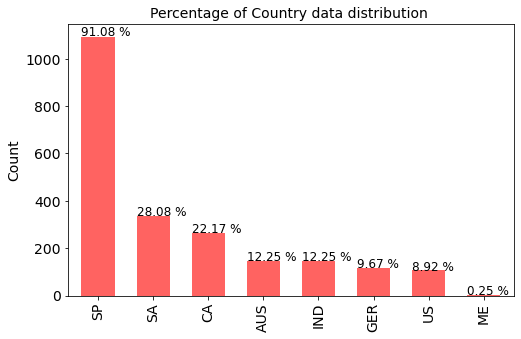

In [ ]:
def percentage_country(df):
    df=df.copy()
    cu_data=pd.DataFrame(df['Country'].value_counts())
    cu_data['Frequency_Percentage']=[round(i/cu_data['Country'].sum(),2) for i in cu_data['Country']]
    print(cu_data)
    ax = df['Country'].value_counts().plot(kind='bar', figsize=(8, 5),color=['#ff6361'],fontsize=14, width=0.6)

    ax.set_title('Percentage of Country data distribution ',fontsize=14)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    for p in ax.patches:
        ax.annotate(str(round(p.get_height()*100/221600,2))+' %', (p.get_x() * 1.0005, p.get_height() * 1.005),fontsize=12)
    ax.set_ylabel('Count',fontsize=14)
    
    
    
percentage_country(df)

<h3>10.Plot a bar plot which represents all the qualifications of the customers country-wise?What is the percentage of graduates in Spain?
</h3>

Country      AUS     CA   GER    IND    ME     SA     SP    US
Education                                                     
2n Cycle    4.00  12.00  9.50  10.00  0.00  12.50  48.50  3.50
Basic       7.41  12.96  3.70   7.41  0.00  11.11  51.85  5.56
Graduation  7.08  11.83  5.20   6.81  0.09  14.43  48.92  5.65
Master      7.95  13.42  5.21   5.75  0.27  16.44  46.85  4.11
PhD         5.61  11.23  3.74   5.41  0.21  17.67  52.18  3.95
**********************************************************************


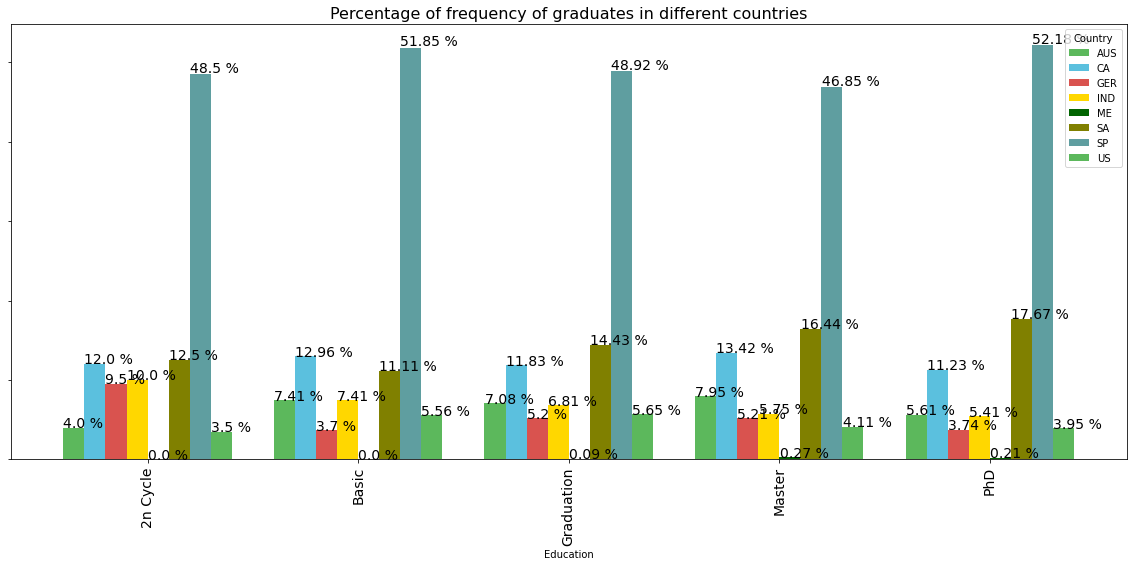

In [ ]:
def cross_country_edu_percentage(df):
    df=df.copy()
    country_crosstab_perc=pd.crosstab(df['Education'],df['Country']).apply(lambda r: round(r*100/r.sum(),2), axis=1)
    print(country_crosstab_perc)
    print("*"*70)
    ax = country_crosstab_perc.plot(kind='bar', figsize=(20, 8),color=['#5cb85c','#5bc0de','#d9534f','#FFD700','#006400','#808000','#5F9EA0'],fontsize=14, width=0.8)
    ax.set_title('Percentage of frequency of graduates in different countries',fontsize=16)
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    for p in ax.patches:
        ax.annotate(str(p.get_height())+' %', (p.get_x() * 1.0005, p.get_height() * 1.005),fontsize=14)
    ax.tick_params(bottom="True", left="True")
    ax.set_yticklabels([])
    
    
    
cross_country_edu_percentage(df)

- 48.92% of graduates are from spain.

<h3>11. Plot a percentage segment graph between the ‘Marital_Status’, and ‘Education’ of customers.
</h3>

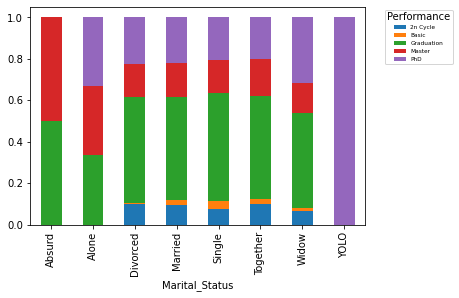

In [ ]:
fontP = FontProperties()
fontP.set_size('xx-small')
props = df.groupby("Marital_Status")['Education'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')
plt.legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

<h3>12.Plot a percentage segment graph between the ‘‘Education” and ‘Country’ of customers.</h3>


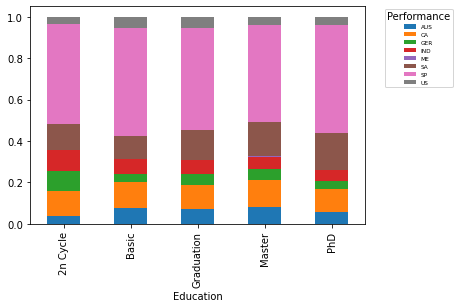

In [ ]:
fontP = FontProperties()
fontP.set_size('xx-small')
props = df.groupby("Education")['Country'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True')
plt.legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

<h1>Model Building and Evaluation </h1>

<h3>1. Plot a count-plot of the target variable. </h3>


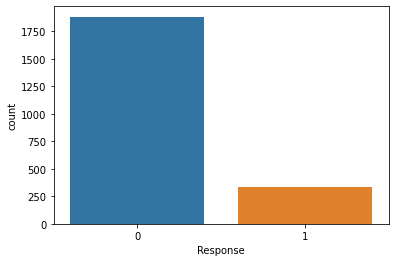

In [ ]:
def plot_target(df):
    df=df.copy(deep=True)
    sns.countplot(df['Response'])

plot_target(df)

<h3>2. Drop 'ID', 'Year_Birth', 'Dt_Customer', 'Country', 'Education', 'Marital_Status' columns.</h3>


In [ ]:
df.drop(['ID','Year_Birth','Dt_Customer','Country','Education','Marital_Status'],axis=1,inplace=True)

In [ ]:
new_df=df.copy(deep=True)

<h3>3. Store the target column (i.e.Response) in the y variable and the rest of the columns in the X variable.</h3>

In [ ]:
y=new_df['Response']
df.drop(['Response'],axis=1,inplace=True)
X=df

In [ ]:
new_x=X.as_matrix()
new_y=y.as_matrix()
new_y=new_y.reshape(-1,1)

<h3>4.Split the dataset into two parts (i.e. 70% train and 30% test) using random_state=42. </h3>

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(new_x,new_y,test_size=0.3,random_state=42)

<h3> 5.Train a Naive Bayes model and plot the below metrics.</h3>
- Plot the Error plots for the given alpha (i.e. alpha=[0.00001,0.0001,0.001,0.1,1,10,100,1000]). Choose the best alpha. 
- Train the model on the best alpha value. Print the accuracy score, classification report, roc_auc curve for both the train and test set.

For the alpha value:  1e-05  the accuracy on the train data 0.6989039329464861
For the alpha value : 1e-05 Accuracy on the test data 0.6842105263157895
**************************************************
For the alpha value:  0.0001  the accuracy on the train data 0.6989039329464861
For the alpha value : 0.0001 Accuracy on the test data 0.6842105263157895
**************************************************
For the alpha value:  0.001  the accuracy on the train data 0.6989039329464861
For the alpha value : 0.001 Accuracy on the test data 0.6842105263157895
**************************************************
For the alpha value:  0.1  the accuracy on the train data 0.6989039329464861
For the alpha value : 0.1 Accuracy on the test data 0.6842105263157895
**************************************************
For the alpha value:  1  the accuracy on the train data 0.6989039329464861
For the alpha value : 1 Accuracy on the test data 0.6842105263157895
**********************************************

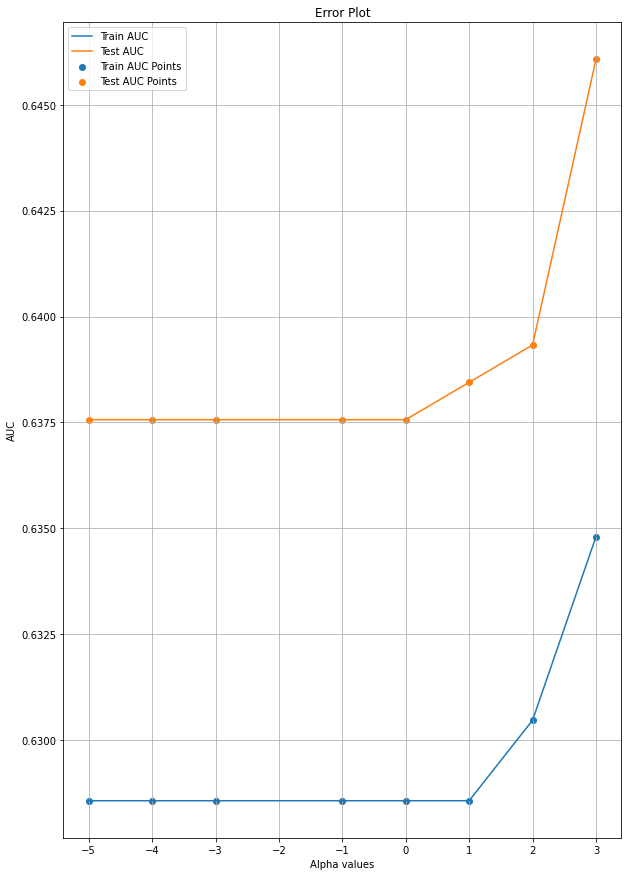

In [ ]:
train_auc=[]
test_auc=[]

alpha=[0.00001,0.0001,0.001,0.1,1,10,100,1000]
for i in alpha:
    nb=MultinomialNB(alpha=i)
    nb.fit(X_train,y_train)
    y_pred_train=nb.predict(X_train)
    y_pred_test=nb.predict(X_test)
    print("For the alpha value: ",i," the accuracy on the train data",accuracy_score(y_train,y_pred_train))
    print("For the alpha value :",i,"Accuracy on the test data",accuracy_score(y_test,y_pred_test))
    print("*"*50)
    train_auc.append(roc_auc_score(y_train,y_pred_train))
    test_auc.append(roc_auc_score(y_test,y_pred_test))
    

plt.plot(np.log10(alpha),train_auc,label='Train AUC')
plt.plot(np.log10(alpha),test_auc,label='Test AUC')

plt.scatter(np.log10(alpha),train_auc,label='Train AUC Points')
plt.scatter(np.log10(alpha),test_auc,label='Test AUC Points')

plt.legend()
plt.xlabel("Alpha values")
plt.ylabel("AUC")
plt.title("Error Plot")
plt.grid()
plt.show()


Train Accuracy Score 0.7272727272727273
Test Accuracy Score 0.7203007518796992
************************************************************
Train Classification Report               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1316
           1       0.28      0.50      0.36       235

    accuracy                           0.73      1551
   macro avg       0.59      0.63      0.59      1551
weighted avg       0.80      0.73      0.76      1551

****************************************
Test Classification Report               precision    recall  f1-score   support

           0       0.90      0.75      0.82       567
           1       0.27      0.54      0.36        98

    accuracy                           0.72       665
   macro avg       0.59      0.65      0.59       665
weighted avg       0.81      0.72      0.75       665

************************************************************
Printing ROC CURVE


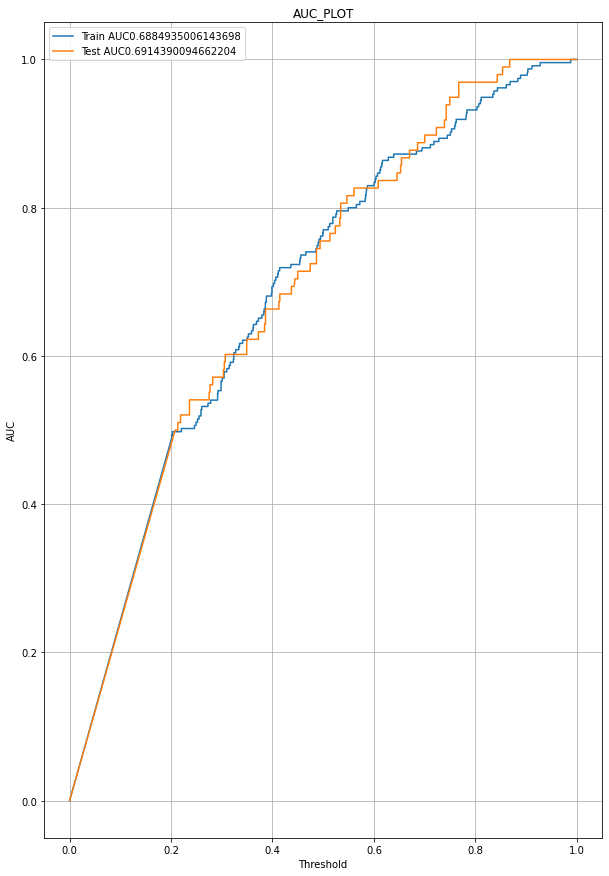

In [ ]:
nb=MultinomialNB(alpha=1)
nb.fit(X_train,y_train)
y_pred_train=nb.predict(X_train)
y_pred_test=nb.predict(X_test)
print("Train Accuracy Score",accuracy_score(y_train,y_pred_train))
print("Test Accuracy Score",accuracy_score(y_test,y_pred_test))
print("*"*60)
print("Train Classification Report",classification_report(y_train,y_pred_train))
print("*"* 40)
print("Test Classification Report",classification_report(y_test,y_pred_test))
print("*"*60)
print("Printing ROC CURVE")
y_train_pred=nb.predict_proba(X_train)
y_test_pred=nb.predict_proba(X_test)
train_fpr,train_tpr,tr_threshold=roc_curve(y_train,y_train_pred[:,1])
test_fpr,test_tpr,ts_threshold=roc_curve(y_test,y_test_pred[:,1])
plt.plot(train_fpr,train_tpr,label='Train AUC'+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label='Test AUC'+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("AUC")
plt.title("AUC_PLOT")
plt.grid()
plt.show()

<h3>6. Train a K-Nearest Neighbors classification model and plot the below metrics.</h3>
- Plot the Error plots for the  K-nearest neighbors models on the given K values(i.e. k_value=[3,5,7,9,11,13,15]). Find the best K .
- Train the model on the best K value. Print the accuracy score, classification report, roc_auc curve for both the train and test set


For the K value:  3  the accuracy on the train data 0.8949065119277885
For the K value : 3 Accuracy on the test data 0.8225563909774436
**************************************************
For the K value:  5  the accuracy on the train data 0.8762088974854932
For the K value : 5 Accuracy on the test data 0.8330827067669173
**************************************************
For the K value:  7  the accuracy on the train data 0.8652482269503546
For the K value : 7 Accuracy on the test data 0.843609022556391
**************************************************
For the K value:  9  the accuracy on the train data 0.8588007736943907
For the K value : 9 Accuracy on the test data 0.8451127819548873
**************************************************
For the K value:  11  the accuracy on the train data 0.8581560283687943
For the K value : 11 Accuracy on the test data 0.8406015037593985
**************************************************
For the K value:  13  the accuracy on the train data 0.859445519

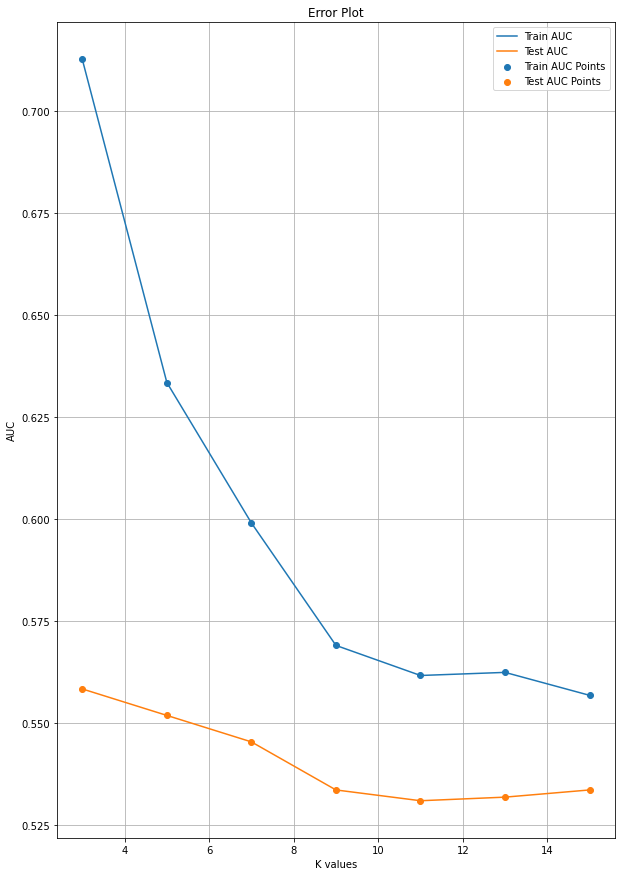

In [ ]:
train_auc=[]
test_auc=[]

k_value=[3,5,7,9,11,13,15]
for i in k_value:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_train=knn.predict(X_train)
    y_pred_test=knn.predict(X_test)
    print("For the K value: ",i," the accuracy on the train data",accuracy_score(y_train,y_pred_train))
    print("For the K value :",i,"Accuracy on the test data",accuracy_score(y_test,y_pred_test))
    print("*"*50)
    train_auc.append(roc_auc_score(y_train,y_pred_train))
    test_auc.append(roc_auc_score(y_test,y_pred_test))
    

plt.plot(k_value,train_auc,label='Train AUC')
plt.plot(k_value,test_auc,label='Test AUC')

plt.scatter(k_value,train_auc,label='Train AUC Points')
plt.scatter(k_value,test_auc,label='Test AUC Points')

plt.legend()
plt.xlabel("K values")
plt.ylabel("AUC")
plt.title("Error Plot")
plt.grid()
plt.show()


Train Accuracy Score 0.8652482269503546
Test Accuracy Score 0.843609022556391
************************************************************
Train Classification Report               precision    recall  f1-score   support

           0       0.88      0.98      0.93      1316
           1       0.67      0.22      0.33       235

    accuracy                           0.87      1551
   macro avg       0.77      0.60      0.63      1551
weighted avg       0.84      0.87      0.83      1551

****************************************
Test Classification Report               precision    recall  f1-score   support

           0       0.86      0.97      0.91       567
           1       0.40      0.12      0.19        98

    accuracy                           0.84       665
   macro avg       0.63      0.55      0.55       665
weighted avg       0.80      0.84      0.81       665

************************************************************
Printing ROC CURVE


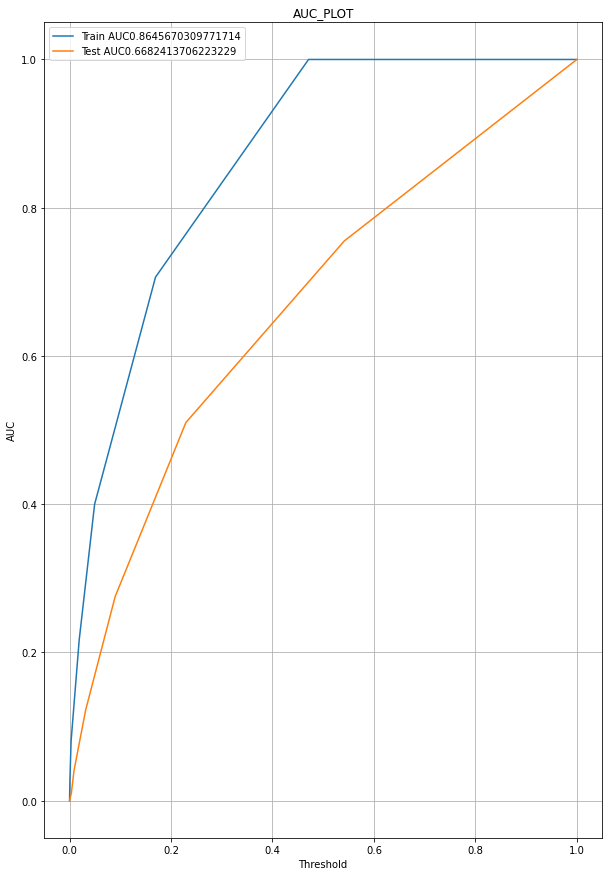

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_train=knn.predict(X_train)
y_pred_test=knn.predict(X_test)
print("Train Accuracy Score",accuracy_score(y_train,y_pred_train))
print("Test Accuracy Score",accuracy_score(y_test,y_pred_test))
print("*"*60)
print("Train Classification Report",classification_report(y_train,y_pred_train))
print("*"* 40)
print("Test Classification Report",classification_report(y_test,y_pred_test))
print("*"*60)
print("Printing ROC CURVE")
y_train_pred=knn.predict_proba(X_train)
y_test_pred=knn.predict_proba(X_test)
train_fpr,train_tpr,tr_threshold=roc_curve(y_train,y_train_pred[:,1])
test_fpr,test_tpr,ts_threshold=roc_curve(y_test,y_test_pred[:,1])
plt.plot(train_fpr,train_tpr,label='Train AUC'+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label='Test AUC'+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("AUC")
plt.title("AUC_PLOT")
plt.grid()
plt.show()

<h3>7.Train a Support Vector classification model and plot the below metrics.</h3>
-  Plot the error plots for the support vector classification models on the  given C values(i.e. c_value=[0.01,0.1, 1, 10, 100, 1000]). Find the best C.

- Train the model on the best C value. Print the accuracy score, classification report, roc_auc curve for both the train and test set. 


For the C value:  0.01  the accuracy on the train data 0.6627981947130883
For the C value : 0.01 Accuracy on the test data 0.6481203007518797
**************************************************
For the C value:  0.1  the accuracy on the train data 0.6950354609929078
For the C value : 0.1 Accuracy on the test data 0.6796992481203008
**************************************************
For the C value:  1  the accuracy on the train data 0.75177304964539
For the C value : 1 Accuracy on the test data 0.7368421052631579
**************************************************
For the C value:  10  the accuracy on the train data 0.7711154094132817
For the C value : 10 Accuracy on the test data 0.7563909774436091
**************************************************
For the C value:  100  the accuracy on the train data 0.7730496453900709
For the C value : 100 Accuracy on the test data 0.7699248120300752
**************************************************
For the C value:  1000  the accuracy on the train d

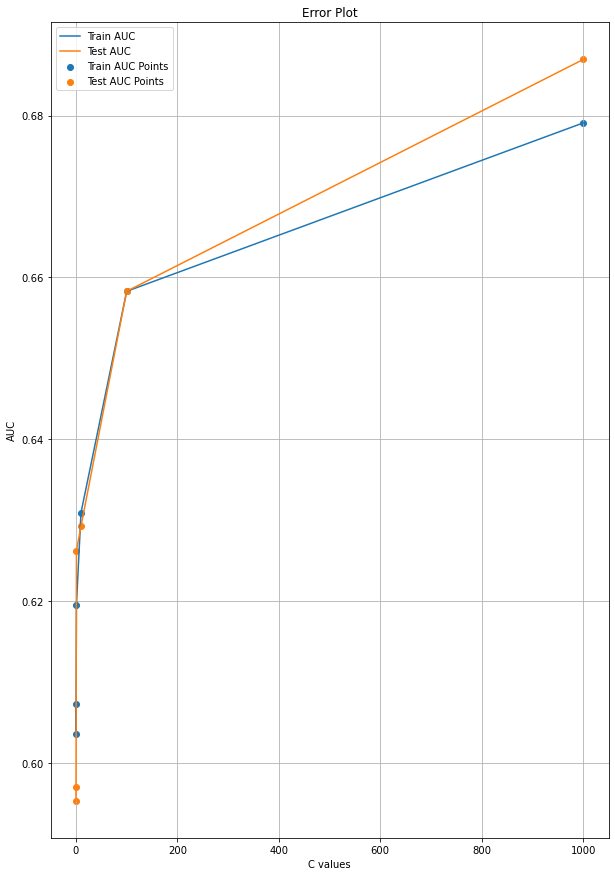

In [ ]:
train_auc=[]
test_auc=[]

c_value=[0.01,0.1, 1, 10, 100, 1000]
for i in c_value:
    svc=SVC(C=i,class_weight='balanced')
    svc.fit(X_train,y_train)
    y_pred_train=svc.predict(X_train)
    y_pred_test=svc.predict(X_test)
    print("For the C value: ",i," the accuracy on the train data",accuracy_score(y_train,y_pred_train))
    print("For the C value :",i,"Accuracy on the test data",accuracy_score(y_test,y_pred_test))
    print("*"*50)
    train_auc.append(roc_auc_score(y_train,y_pred_train))
    test_auc.append(roc_auc_score(y_test,y_pred_test))
    

plt.plot(c_value,train_auc,label='Train AUC')
plt.plot(c_value,test_auc,label='Test AUC')

plt.scatter(c_value,train_auc,label='Train AUC Points')
plt.scatter(c_value,test_auc,label='Test AUC Points')

plt.legend()
plt.xlabel("C values")
plt.ylabel("AUC")
plt.title("Error Plot")
plt.grid()
plt.show()

Train Accuracy Score 0.7730496453900709
Test Accuracy Score 0.7699248120300752
************************************************************
Train Classification Report               precision    recall  f1-score   support

           0       0.90      0.82      0.86      1316
           1       0.33      0.49      0.40       235

    accuracy                           0.77      1551
   macro avg       0.62      0.66      0.63      1551
weighted avg       0.81      0.77      0.79      1551

****************************************
Test Classification Report               precision    recall  f1-score   support

           0       0.90      0.82      0.86       567
           1       0.32      0.50      0.39        98

    accuracy                           0.77       665
   macro avg       0.61      0.66      0.62       665
weighted avg       0.82      0.77      0.79       665

************************************************************
Printing ROC CURVE


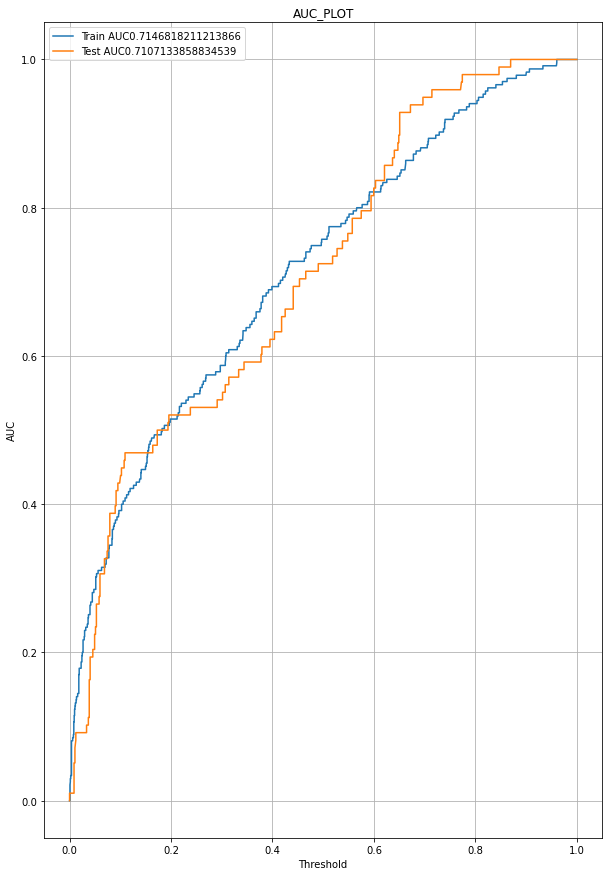

In [ ]:
svc=SVC(C=100,class_weight='balanced',probability=True)
svc.fit(X_train,y_train)
y_pred_train=svc.predict(X_train)
y_pred_test=svc.predict(X_test)
print("Train Accuracy Score",accuracy_score(y_train,y_pred_train))
print("Test Accuracy Score",accuracy_score(y_test,y_pred_test))
print("*"*60)
print("Train Classification Report",classification_report(y_train,y_pred_train))
print("*"* 40)
print("Test Classification Report",classification_report(y_test,y_pred_test))
print("*"*60)
print("Printing ROC CURVE")
y_train_pred=svc.predict_proba(X_train)
y_test_pred=svc.predict_proba(X_test)
train_fpr,train_tpr,tr_threshold=roc_curve(y_train,y_train_pred[:,1])
test_fpr,test_tpr,ts_threshold=roc_curve(y_test,y_test_pred[:,1])
plt.plot(train_fpr,train_tpr,label='Train AUC'+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label='Test AUC'+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("AUC")
plt.title("AUC_PLOT")
plt.grid()
plt.show()